<a href="https://colab.research.google.com/github/mzucali/pyStereoRose/blob/main/RoseDiagram_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

python IMPORT STATEMENTs

RUN the box

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

Function definition

RUN it

In [ ]:


# Function to load and separate data based on the 'type' column
def load_and_separate_data(file_path, direction_column, weight_column, type_column, use_weight):
    df = pd.read_excel(file_path)
    separated_data = {'axes': ([], []), 'directions': ([], [])}

    for _, row in df.iterrows():
        data_type = row[type_column].strip().lower()
        if data_type not in ['axes', 'directions']:
            continue  # Skip invalid entries

        direction = row[direction_column]
        if pd.isna(direction):
            continue  # Skip missing values

        weight = row[weight_column] if use_weight == 'yes' and not pd.isna(row[weight_column]) else 1

        if data_type == 'axes':
            # Convert axes to bi-directional (0-180° mirrored to 180-360°)
            direction1 = direction % 180  # Normalize to [0,180)
            direction2 = (direction1 + 180) % 360  # Mirror at 180°
            separated_data[data_type][0].extend([direction1, direction2])
            separated_data[data_type][1].extend([weight, weight])
        else:
            separated_data[data_type][0].append(direction % 360)  # Ensure within 0-360
            separated_data[data_type][1].append(weight)

    return separated_data





**SET** VARIABLES


1.   upload your .xlsx file
2.   set the headers here (e.g., **DIR** for azimuthal values, **LEN** for weight factor, **mode** for data type)
3. data type must be **directions** (bi-directional data) or **axes** (mono-directional data)
4. example file is here: https://www.dropbox.com/scl/fi/odpv1fg18er3ujys99u0y/Rose_input_test.xlsx?rlkey=4un4kbk01d4ais4t8cos69sc8&dl=0
5. change file_path = '' variable with your actual file name


then **RUN**





In [ ]:
# Ask the user for input
#file_path = input("Enter the file path: ")
file_path = '/content/Rose_input_test.xlsx'
#sheet_name = input("Enter the sheet name: ")
#direction_column = input("Enter the direction column name: ")
direction_column = 'DIR'

#weight_column = input("Enter the weight column name: ")
weight_column = 'LEN'

#type_column = input("Enter the type column name: ")
type_column = 'mode'

#use_weight = input("Do you want to use the weight column? (yes/no): ").strip().lower()
use_weight = 'no'

# Load and separate data
separated_data = load_and_separate_data(file_path, direction_column, weight_column, type_column, use_weight)


check data with this output for **axes** type data

In [ ]:
print(separated_data['axes'])

([160.12, 340.12, 168.931, 348.93100000000004, 114.281, 294.281, 75.528, 255.52800000000002, 131.688, 311.688, 62.404, 242.404, 127.328, 307.328, 171.65, 351.65, 111.189, 291.18899999999996, 118.257, 298.257, 112.032, 292.032, 103.868, 283.868, 122.843, 302.843, 173.203, 353.203, 108.037, 288.03700000000003, 106.472, 286.472, 85.869, 265.869, 51.395, 231.395, 131.435, 311.435, 44.049, 224.049, 45.99, 225.99, 35.117, 215.117, 78.053, 258.053, 94.017, 274.017, 155.224, 335.224, 28.185, 208.185, 11.033, 191.033, 121.392, 301.392, 9.488, 189.488, 133.739, 313.73900000000003, 161.565, 341.565, 126.361, 306.361, 17.638, 197.638, 170.92, 350.91999999999996, 135.849, 315.849, 96.208, 276.20799999999997, 85.327, 265.327, 70.291, 250.291, 110.95, 290.95, 106.057, 286.057, 100.656, 280.656, 79.078, 259.078, 111.788, 291.788, 101.606, 281.606, 117.883, 297.883, 135.85, 315.85, 59.895, 239.895, 27.418, 207.418, 113.671, 293.671, 136.019, 316.019, 115.278, 295.278, 90.0, 270.0, 90.0, 270.0, 128.81, 

check data with this output for **direction** type data

In [ ]:
print(separated_data['directions'])

([38.08, 141.708, 32.53, 46.979, 79.239, 90.0, 54.8, 127.515, 83.565, 97.47, 88.993, 13.704, 90.0, 164.303, 92.299, 88.355, 122.578, 90.0, 84.139, 142.003, 15.75, 83.401, 79.324, 145.018, 10.7, 3.971, 130.617, 159.59, 164.209, 28.306, 12.938, 46.208, 101.959, 43.061, 110.108, 68.363, 85.516, 103.903, 76.514, 171.703, 75.952, 155.682, 17.752, 81.218, 16.533, 80.146, 47.517, 111.7, 9.642, 104.166, 104.317, 56.647, 117.362, 106.67, 159.952, 138.719, 144.482, 99.968, 93.609, 99.109, 119.471, 108.057, 114.8, 117.666, 98.731, 64.913, 53.981, 107.741, 118.277, 100.968, 116.005, 136.843, 95.713, 99.396, 121.762, 124.008], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


RUN this code to get plot and save it as raster (png) and vector files (eps, pdf, svg)

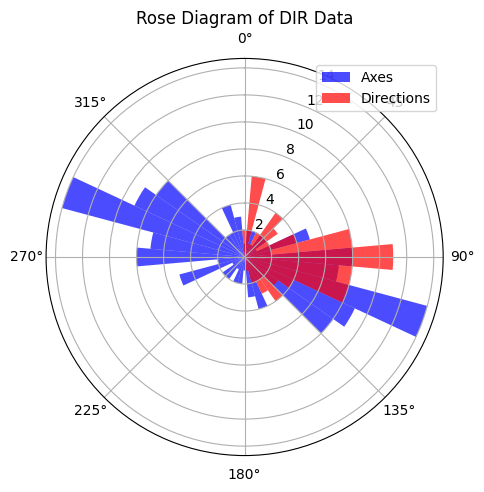

In [ ]:
# Initialize figure
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
plt.tight_layout()
colors = {'axes': 'blue', 'directions': 'red'}
labels = {'axes': 'Axes', 'directions': 'Directions'}

# Process and plot each type
theta_range = (0, 2 * np.pi)
num_bins = 36
for data_type, (direction_data, weights) in separated_data.items():
    if direction_data:
        direction_data_radians = np.radians(direction_data)
        counts, bin_edges = np.histogram(direction_data_radians, bins=num_bins, range=theta_range, weights=weights)
        ax.bar(bin_edges[:-1], counts, width=(2*np.pi/num_bins), bottom=0.0, color=colors[data_type], alpha=1, label=labels[data_type])

# Set plot properties
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_thetamin(0)
ax.set_thetamax(360)
ax.set_title(f"Rose Diagram of {direction_column} Data", pad=25)
if any(len(direction_data) > 0 for direction_data, _ in separated_data.values()):
    ax.legend()

# Show and save the plot
plt.show()
output_filename = "categorized_rose_diagram.png"
fig.savefig(output_filename)

# Save the plot in different vector formats
output_filename_svg = "categorized_rose_diagram.svg"
output_filename_pdf = "categorized_rose_diagram.pdf"
output_filename_eps = "categorized_rose_diagram.eps"

fig.savefig(output_filename_svg, format="svg")
fig.savefig(output_filename_pdf, format="pdf")
fig.savefig(output_filename_eps, format="eps")

plt.close("all")